# **Sentimental Analysis for 2020 US Election Slogans**

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

import re #regex
from textblob import TextBlob #sentimate analysis
from textblob import Word
from nltk.probability import FreqDist

#graphs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Importing the datasets

In [12]:
#data importation
trump_data = pd.read_csv('hashtag_donaldtrump2.csv', lineterminator='\n')#trump tweets dataset
biden_data =pd.read_csv('hashtag_joebiden2.csv', lineterminator='\n')#biden tweets dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



Trump

In [13]:
trump_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r
0,15-10-2020 00:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21-10-2020 00:00\r
1,15-10-2020 00:00,1.32E+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,08-07-2011 13:12,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4\r
2,15-10-2020 00:00,1.32E+18,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7\r
3,15-10-2020 00:00,1.32E+18,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",05-02-2017 21:32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1\r
4,15-10-2020 00:00,1.32E+18,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",15-06-2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5\r


In [14]:
trump_data.shape 

(50999, 21)

In [15]:
trump_data.describe()

,retweet_count,lat,long
count,50985.000000,26453.000000,26453.000000
mean,1.810425,37.039310,-56.991433
std,36.918331,15.942233,63.203916
min,0.000000,-53.352752,-161.755833
25%,0.000000,34.053691,-100.445882
50%,0.000000,39.783730,-79.383935
75%,0.000000,43.653482,-0.772350
max,5324.000000,90.000000,179.012274


In [16]:
trump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            50993 non-null  object 
 1   tweet_id              50993 non-null  object 
 2   tweet                 50993 non-null  object 
 3   likes                 50992 non-null  object 
 4   retweet_count         50985 non-null  float64
 5   source                50856 non-null  object 
 6   user_id               50985 non-null  object 
 7   user_name             50983 non-null  object 
 8   user_screen_name      50985 non-null  object 
 9   user_description      45732 non-null  object 
 10  user_join_date        50975 non-null  object 
 11  user_followers_count  50984 non-null  object 
 12  user_location         35604 non-null  object 
 13  lat                   26453 non-null  float64
 14  long                  26453 non-null  float64
 15  city               

In [17]:
#add a column specifying which dataset the tweet belongs to
trump_data.loc[:,'candidate'] = 'Trump'

In [18]:
trump_data.sort_values(by='created_at') #sort by creation times
trump_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r,candidate
0,15-10-2020 00:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21-10-2020 00:00\r,Trump
1,15-10-2020 00:00,1.32E+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9.0,Social Mediaset,331617619,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,08-07-2011 13:12,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.4\r,Trump
2,15-10-2020 00:00,1.32E+18,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,00:00.7\r,Trump
3,15-10-2020 00:00,1.32E+18,2 hours since last tweet from #Trump! Maybe he...,0,0.0,Trumpytweeter,8.28E+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",05-02-2017 21:32,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.1\r,Trump
4,15-10-2020 00:00,1.32E+18,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",15-06-2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,00:01.5\r,Trump


Joe Biden

In [20]:
biden_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r
0,15-10-2020 00:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21-10-2020 00:00\r
1,15-10-2020 00:00,1.32E+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Twitter for iPad,809904438,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",08-09-2012 01:03,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5\r
2,15-10-2020 00:00,1.32E+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Twitter Web App,3494182277,Flag Waver,Flag_Wavers,NaN,30-08-2015 19:38,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,00:01.0\r
3,15-10-2020 00:00,1.32E+18,@chrislongview Watching and setting dvr. Let’s...,0,0.0,Twitter for iPhone,8.24E+17,Michelle Ferg,MichelleFerg4,NaN,25-01-2017 14:16,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6\r
4,15-10-2020 00:00,1.32E+18,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,Twitter Web App,1.03E+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,24-08-2018 01:49,390,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,00:02.1\r


In [21]:
biden_data.shape

(49999, 21)

In [22]:
biden_data.describe()

,retweet_count,lat,long
count,49975.000000,25394.000000,25394.000000
mean,4.398659,36.986627,-65.710813
std,301.266905,13.879488,59.130422
min,0.000000,-79.406307,-159.587161
25%,0.000000,33.956200,-100.445882
50%,0.000000,39.783730,-81.693445
75%,0.000000,41.921673,-72.757105
max,63473.000000,90.000000,179.048837


In [23]:
biden_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            49999 non-null  object 
 1   tweet_id              49988 non-null  object 
 2   tweet                 49988 non-null  object 
 3   likes                 49977 non-null  object 
 4   retweet_count         49975 non-null  float64
 5   source                49802 non-null  object 
 6   user_id               49975 non-null  object 
 7   user_name             49962 non-null  object 
 8   user_screen_name      49975 non-null  object 
 9   user_description      43799 non-null  object 
 10  user_join_date        49958 non-null  object 
 11  user_followers_count  49973 non-null  object 
 12  user_location         33603 non-null  object 
 13  lat                   25394 non-null  float64
 14  long                  25394 non-null  float64
 15  city               

In [24]:
#add a column specifying which dataset the tweet belongs to
biden_data.loc[:,'candidate'] = 'Biden'

In [25]:
biden_data.sort_values(by= 'created_at') #sort by creation time
biden_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r,candidate
0,15-10-2020 00:00,1.32E+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,23-08-2011 15:33,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21-10-2020 00:00\r,Biden
1,15-10-2020 00:00,1.32E+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0,0.0,Twitter for iPad,809904438,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",08-09-2012 01:03,6628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00.5\r,Biden
2,15-10-2020 00:00,1.32E+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0,0.0,Twitter Web App,3494182277,Flag Waver,Flag_Wavers,NaN,30-08-2015 19:38,1536,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,00:01.0\r,Biden
3,15-10-2020 00:00,1.32E+18,@chrislongview Watching and setting dvr. Let’s...,0,0.0,Twitter for iPhone,8.24E+17,Michelle Ferg,MichelleFerg4,NaN,25-01-2017 14:16,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:01.6\r,Biden
4,15-10-2020 00:00,1.32E+18,#censorship #HunterBiden #Biden #BidenEmails #...,1,0.0,Twitter Web App,1.03E+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,24-08-2018 01:49,390,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,00:02.1\r,Biden


In [26]:
#make country name consistent
d = {"United States of America":"United States"}
trump_data['country'].replace(d, inplace=True)
biden_data['country'].replace(d, inplace=True)

trump_data = trump_data.loc[trump_data['country'] == "United States"]
biden_data = biden_data.loc[biden_data['country'] == "United States"]



In [27]:
#drop the columns with null values
trump_data = trump_data.dropna()
biden_data = biden_data.dropna()

In [28]:
trump_data.shape

(7686, 22)

In [29]:
biden_data.shape

(7438, 22)

Visualization by States

In [30]:
trump_data1 = trump_data.groupby(['state']).count().tweet #group by states
test1 = pd.DataFrame(trump_data1)
biden_data1 = biden_data.groupby(['state']).count().tweet
test2 = pd.DataFrame(biden_data1)


state_data = pd.merge(test1, test2, on= 'state') #join the two tables using the state
state_data = state_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y': 'Biden Tweets'})
state_data.head()

,Trump Tweets,Biden Tweets
state,,
Alabama,24,25
Alaska,4,9
Arizona,100,161
Arkansas,7,8
California,1522,1372


Text(0, 0.5, 'Number of Tweets')

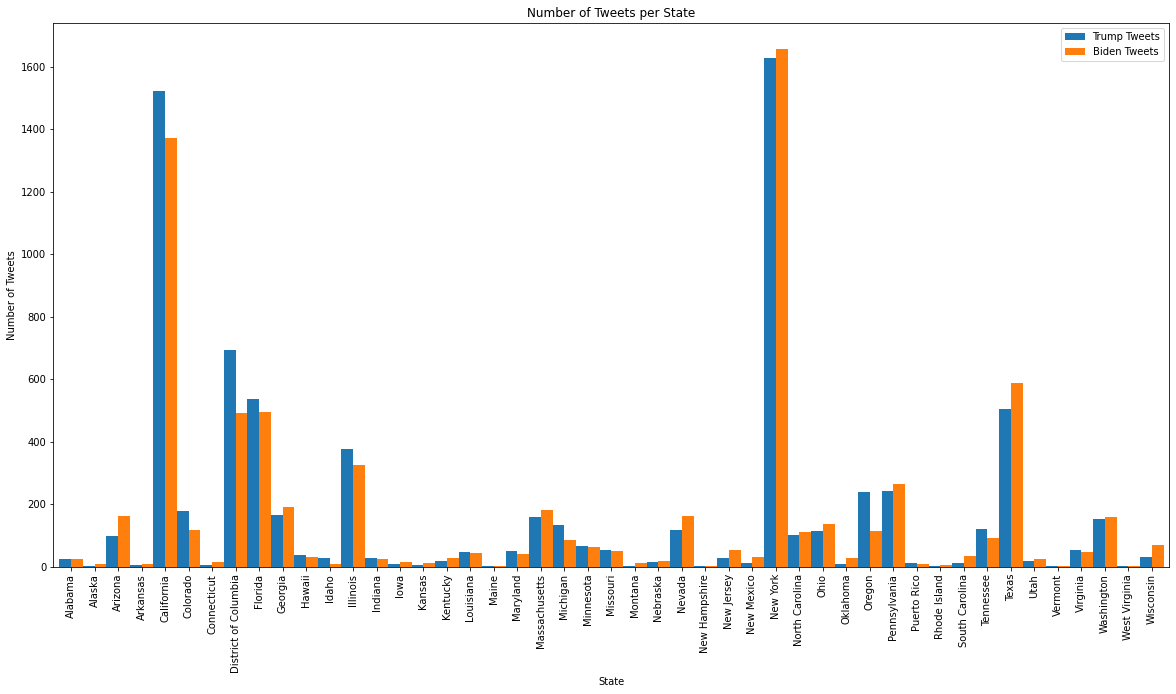

In [31]:
state_data.plot(kind='bar',title='Number of Tweets per State', figsize=(20,10), width = 1)
plt.xlabel('State')
plt.ylabel('Number of Tweets')

Visualization by Top 5 Sources

In [32]:
#group by sources, put count in descending order, and select top 5 sources
trump_sources = trump_data.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
source1 = pd.DataFrame(trump_sources)
biden_sources = biden_data.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
source2 = pd.DataFrame(biden_sources)
source_data = pd.merge(source1, source2, on= 'source')
source_data
source_data = source_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y': 'Biden Tweets'})
source_data.head()

,Trump Tweets,Biden Tweets
source,,
Twitter Web App,2747,2541
Twitter for iPhone,2582,2800
Twitter for Android,1329,1241
Twitter for iPad,268,351
TweetDeck,141,121


Text(0, 0.5, 'Number of Tweets')

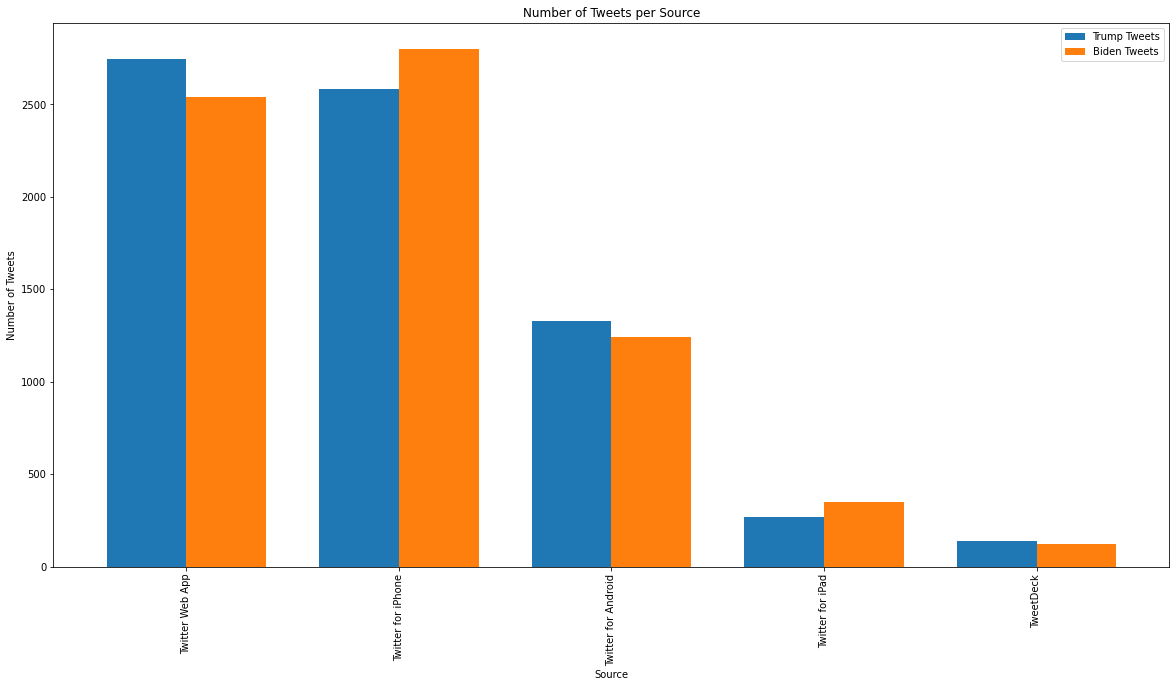

In [33]:
source_data.plot(kind='bar',title='Number of Tweets per Source', figsize=(20,10), width = 0.75)
plt.xlabel('Source')
plt.ylabel('Number of Tweets')

Cleaning the tweets

In [34]:
#function to get rid of hashtags, @, and other special characters in the tweets
def tweet_cleaning(tweet):
    tweet = tweet.lower()
    to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
    tweet = re.sub(to_remove, ' ', tweet) 
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)

    filtered = []
    for w in word_tokens:
        if w not in stop_words:
            filtered.append(w)
    
    return filtered

#sample to demonstrate the function 
sample = "This is is is a sample sentence to test if stop words works"
tweet_cleaning(sample)

['sample', 'sentence', 'test', 'stop', 'words', 'works']

In [35]:
trump_tweets = trump_data['tweet'].apply(lambda x: tweet_cleaning(x))
biden_tweets = biden_data['tweet'].apply(lambda x: tweet_cleaning(x))

In [36]:
trump_tweets.head()

2     [trump, student, used, hear, years, ten, years...
4              [get, tie, get, tie, trump, rally, iowa]
11    [nypost, censorship, censored, twitter, manipu...
12    [trump, presidenttrump, trump, landslidevictor...
22    [trump, nobody, likes, tell, farmers, better, ...
Name: tweet, dtype: object

In [37]:
biden_tweets.head()

6     [nypost, censorship, censored, twitter, manipu...
17    [comments, democrats, understand, ruthless, ch...
25    [realjameswoods, bidencrimefamily, joebiden, h...
29    [come, abc, please, right, thing, move, biden,...
34    [realdonaldtrump, addresses, joebiden, hunterb...
Name: tweet, dtype: object

Sentiment Analysis

In [38]:
#functions that will assist in the sentiment analysis
def subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity
def conclusion(val):
    if val<0:
        return 'negative'
    elif val==0:
        return 'neutral'
    else:
        return 'positive'

Trump Tweets

In [39]:
subjectivity_col = trump_data['tweet'].apply(subjectivity)
polarity_col = trump_data['tweet'].apply(polarity)
analysis_col = polarity_col.apply(conclusion)

df = {'Tweet': trump_tweets, 'Subjectivity': subjectivity_col, 'Polarity': polarity_col, 'Sentiment': analysis_col}
sentiment_analysis = pd.DataFrame(df)
sentiment_analysis

,Tweet,Subjectivity,Polarity,Sentiment
2,"[trump, student, used, hear, years, ten, years...",0.333333,0.333333,positive
4,"[get, tie, get, tie, trump, rally, iowa]",0.000000,0.000000,neutral
11,"[nypost, censorship, censored, twitter, manipu...",0.678571,-0.148810,negative
12,"[trump, presidenttrump, trump, landslidevictor...",0.750000,0.500000,positive
22,"[trump, nobody, likes, tell, farmers, better, ...",0.595238,0.261905,positive
...,...,...,...,...
50948,"[senador, republicado, dice, que, trump, coque...",0.000000,0.000000,neutral
50965,"[trump, realizing, matlock, murder, wrote, alw...",0.100000,0.000000,neutral
50967,"[ap, fact, chec, trump, continues, false, stat...",0.600000,-0.400000,negative
50972,"[billkristol, putin, going, deal, trump, show,...",0.000000,0.000000,neutral


In [40]:
neg_num = sentiment_analysis[sentiment_analysis['Sentiment']=='negative'].Sentiment.count()
neu_num = sentiment_analysis[sentiment_analysis['Sentiment']=='neutral'].Sentiment.count()
pos_num = sentiment_analysis[sentiment_analysis['Sentiment']=='positive'].Sentiment.count()

print('Sentiment Breakdown: Trump Tweets')
print('Negative Tweets: ', neg_num)
print('Neutral Tweets: ', neu_num)
print('Positive Tweets: ', pos_num)

Sentiment Breakdown: Trump Tweets
Negative Tweets:  1951
Neutral Tweets:  2988
Positive Tweets:  2747


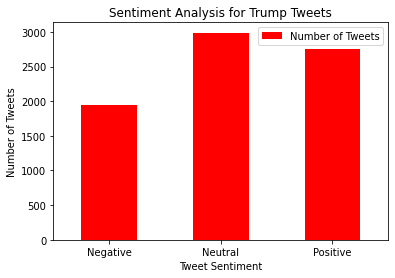

In [41]:
num_sentiment = pd.DataFrame({'Tweet Sentiment': ['Negative', 'Neutral', 'Positive'], 'Number of Tweets': [neg_num, neu_num, pos_num]})
trump_plot = num_sentiment.plot.bar(x='Tweet Sentiment', y='Number of Tweets', title='Sentiment Analysis for Trump Tweets', color = 'red', rot=0)
plt.ylabel('Number of Tweets')
trump_plot

In [42]:
fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [neg_num, neu_num, pos_num])])
fig.update_layout(title_text ='Sentimental analysis tweets Donald Trump')
fig.show()

In [43]:
 def sentiment_analysis(df):
    
    # Determine polarity and subjectivity
    df['Polarity'] = df['tweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['tweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['tweet','Polarity','Subjectivity','Sentiment']].head()
    # Perform sentiment analysis on trump_df
sentiment_analysis(trump_data)


,tweet,Polarity,Subjectivity,Sentiment
2,"#Trump: As a student I used to hear for years,...",0.00,0.0,neutral
4,You get a tie! And you get a tie! #Trump ‘s ra...,-0.25,1.0,negative
11,"In 2020, #NYPost is being #censorship #CENSORE...",0.00,0.0,neutral
12,#Trump #PresidentTrump #Trump2020LandslideVict...,-0.25,1.0,negative
22,"#Trump: Nobody likes to tell you this, but som...",0.00,0.0,neutral


In [44]:
trump_data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at\r,candidate,Polarity,Subjectivity,Sentiment
2,15-10-2020 00:00,1.32E+18,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,00:00.7\r,Trump,0.00,0.0,neutral
4,15-10-2020 00:00,1.32E+18,You get a tie! And you get a tie! #Trump ‘s ra...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",15-06-2009 19:05,5393,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,00:01.5\r,Trump,-0.25,1.0,negative
11,15-10-2020 00:00,1.32E+18,"In 2020, #NYPost is being #censorship #CENSORE...",0,0.0,Twitter for iPhone,19940334,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",02-02-2009 23:08,1396,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,00:04.1\r,Trump,0.00,0.0,neutral
12,15-10-2020 00:00,1.32E+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3,5.0,Twitter for Android,1.24E+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",26-03-2020 23:14,496,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,00:04.5\r,Trump,-0.25,1.0,negative
22,15-10-2020 00:01,1.32E+18,"#Trump: Nobody likes to tell you this, but som...",1,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",26-08-2007 05:56,1185,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,00:08.2\r,Trump,0.00,0.0,neutral


In [45]:
import plotly.express as px
fig = px.scatter(trump_data, x="state", y="Polarity", color="Polarity",
                title="<b>Trump-Related Tweet Polarity by State</b>",
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=800)
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [46]:
fig = px.scatter(trump_data, x="likes", y="Polarity", color="Polarity",
                title="<b>Trump-Related Tweet Polarity by Number of Likes</b>",
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=800)
fig.show()

In [47]:
fig = px.scatter(trump_data, x="retweet_count", y="Polarity", color="Polarity",
                title="<b>Trump-Related Tweet Polarity by Number of Retweets</b>",
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=800)
fig.show()

Text(0.5, 1.0, 'Trump Tweets Word Cloud')

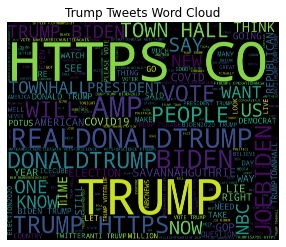

In [85]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=5000, height=4000,stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in trump_data['tweet'].str.upper()]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Trump Tweets Word Cloud")

Biden Tweets

In [53]:
subjectivity_col = biden_data['tweet'].apply(subjectivity)
polarity_col = biden_data['tweet'].apply(polarity)
analysis_col = polarity_col.apply(conclusion)

df = {'Tweet': biden_tweets, 'Subjectivity': subjectivity_col, 'Polarity': polarity_col, 'Sentiment': analysis_col}
sentiment_analysis2 = pd.DataFrame(df)
sentiment_analysis2

,Tweet,Subjectivity,Polarity,Sentiment
6,"[nypost, censorship, censored, twitter, manipu...",0.678571,-0.148810,negative
17,"[comments, democrats, understand, ruthless, ch...",1.000000,-1.000000,negative
25,"[realjameswoods, bidencrimefamily, joebiden, h...",0.000000,0.000000,neutral
29,"[come, abc, please, right, thing, move, biden,...",0.178571,0.078571,positive
34,"[realdonaldtrump, addresses, joebiden, hunterb...",0.500000,0.500000,positive
...,...,...,...,...
49977,"[good, morning, happy, sunday, else, dropped, ...",0.733333,0.241146,positive
49979,"[solmemes, matter, biden, winning, air]",0.750000,0.625000,positive
49986,"[measles, independently, biden, ukraine, corru...",0.341667,0.400000,positive
49989,"[visiting, mom, pennsylvania, non, stop, polit...",0.300000,0.250000,positive


In [54]:
 def sentiment_analysis(df):
    
    # Determine polarity and subjectivity
    df['Polarity'] = df['tweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['tweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['tweet','Polarity','Subjectivity','Sentiment']].head()
    # Perform sentiment analysis on trump_df
sentiment_analysis(biden_data)

,tweet,Polarity,Subjectivity,Sentiment
6,"In 2020, #NYPost is being #censorship #CENSORE...",0.00,0.0,neutral
17,"Comments on this? ""Do Democrats Understand how...",-0.25,1.0,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,-0.25,1.0,negative
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.00,0.0,neutral
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,-0.25,1.0,negative


In [55]:
neg_num2 = sentiment_analysis2[sentiment_analysis2['Sentiment']=='negative'].Sentiment.count()
neu_num2 = sentiment_analysis2[sentiment_analysis2['Sentiment']=='neutral'].Sentiment.count()
pos_num2 = sentiment_analysis2[sentiment_analysis2['Sentiment']=='positive'].Sentiment.count()

print('Sentiment Breakdown: Biden Tweets')
print('Negative Tweets: ', neg_num2)
print('Neutral Tweets: ', neu_num2)
print('Positive Tweets: ', pos_num2)

Sentiment Breakdown: Biden Tweets
Negative Tweets:  1458
Neutral Tweets:  2955
Positive Tweets:  3025


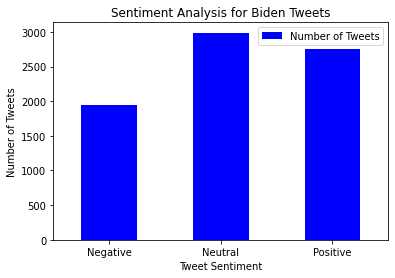

In [56]:
num_sentiment2 = pd.DataFrame({'Tweet Sentiment': ['Negative', 'Neutral', 'Positive'], 'Number of Tweets': [neg_num2, neu_num2, pos_num2]})
biden_plot = num_sentiment.plot.bar(x='Tweet Sentiment', y='Number of Tweets', title='Sentiment Analysis for Biden Tweets', color=
                                     'blue', rot=0)
plt.ylabel('Number of Tweets')
biden_plot

In [57]:
fig = go.Figure(data = [go.Funnelarea(labels = ["positivity","negativity","neutrality"], values = [neg_num2, neu_num2, pos_num2])])
fig.update_layout(title_text ='Sentimental analysis tweets of Joe Biden')
fig.show()

In [58]:
fig = px.scatter(biden_data, x="state", y="Polarity", color="Polarity",
                title="<b>Biden-Related Tweet Polarity by State</b>",
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=800)
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [59]:
fig = px.scatter(biden_data, x="likes", y="Polarity", color="Polarity",
                title="<b>Biden-Related Tweet Polarity by Number of Likes</b>",
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=800)
fig.show()

In [60]:
fig = px.scatter(biden_data, x="retweet_count", y="Polarity", color="Polarity",
                title="<b>Biden-Related Tweet Polarity by Number of Retweets</b>",
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=800)
fig.show()

Text(0.5, 1.0, 'Biden Tweets Word Cloud')

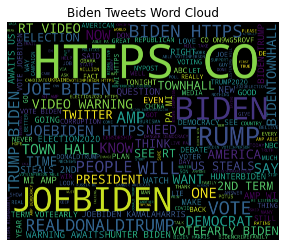

In [86]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=5000, height=4000,stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in biden_data['tweet'].str.upper()]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Biden Tweets Word Cloud")

Overall Sentiment

In [62]:
overall_sent = pd.DataFrame({'Trump Tweets': [neg_num, neu_num, pos_num],
                             'Biden Tweets': [neg_num2, neu_num2, pos_num2]}, 
                              index= ['Negative', 'Neutral', 'Positive'])
overall_sent

,Trump Tweets,Biden Tweets
Negative,1951,1458
Neutral,2988,2955
Positive,2747,3025


Text(0, 0.5, 'Number of Tweets')

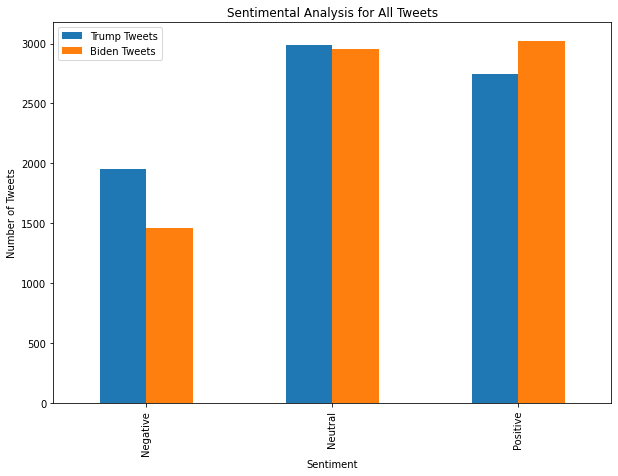

In [63]:
overall_sent.plot(kind='bar',title='Sentimental Analysis for All Tweets', figsize=(10,7))
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

Text(0, 0.5, 'Number of Tweets')

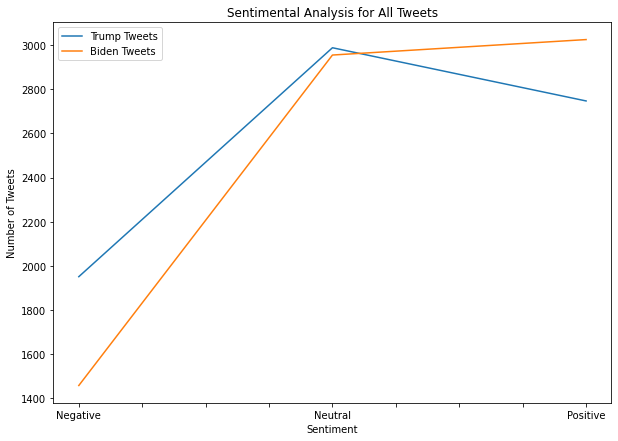

In [64]:
overall_sent.plot(kind='line',title='Sentimental Analysis for All Tweets', figsize=(10,7))
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

In [65]:
#Feature extraction, model selection and model training library
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Libraries to check the model performance
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [102]:
def train_model(train_data, targets):
    X_train, X_test, Y_train, Y_test = train_test_split(train_data, targets, test_size=0.2)

    model = Pipeline([('vect', HashingVectorizer()),
                      ('logreg', LogisticRegression(max_iter=1000, solver="saga")),
              ])
    model.fit(X_train, Y_train)

    return model, X_test, Y_test

In [103]:
def check_model_metrics(model, test_data, test_targets):
    y_pred = model.predict(test_data)

    print("ACCURACY:")
    print(metrics.accuracy_score(test_targets, y_pred)*100)

    print("\nCONFUSSION MATRIX")
    print(confusion_matrix(test_targets, y_pred))

    print("\nCLASSIFICATION REPORT")
    print(classification_report(test_targets, y_pred))

Trump Data Accuracy

In [104]:
train_data = trump_data['tweet']

In [105]:
targets = trump_data['Sentiment']

In [106]:
model, x_test, y_test = train_model(train_data, targets)

In [107]:
check_model_metrics(model, x_test, y_test)

ACCURACY:
98.76462938881664

CONFUSSION MATRIX
[[923   3   0]
 [  3 594   0]
 [  6   7   2]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99       926
     neutral       0.98      0.99      0.99       597
    positive       1.00      0.13      0.24        15

    accuracy                           0.99      1538
   macro avg       0.99      0.71      0.74      1538
weighted avg       0.99      0.99      0.98      1538



Biden Data Accuracy

In [108]:
train_data1 = biden_data['tweet']

In [109]:
targets1 = biden_data['Sentiment']

In [110]:
model, x_test, y_test = train_model(train_data1, targets1)
check_model_metrics(model, x_test, y_test)

ACCURACY:
99.05913978494624

CONFUSSION MATRIX
[[896   2   0]
 [  2 578   0]
 [  5   5   0]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       898
     neutral       0.99      1.00      0.99       580
    positive       0.00      0.00      0.00        10

    accuracy                           0.99      1488
   macro avg       0.66      0.66      0.66      1488
weighted avg       0.98      0.99      0.99      1488



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

